In [1]:
import pandas as pd
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
import warnings
warnings.filterwarnings("ignore")

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [16]:
zerorow=data[data['Amount']==0]

In [17]:
(zerorow['Class']==1).sum()

27

In [4]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

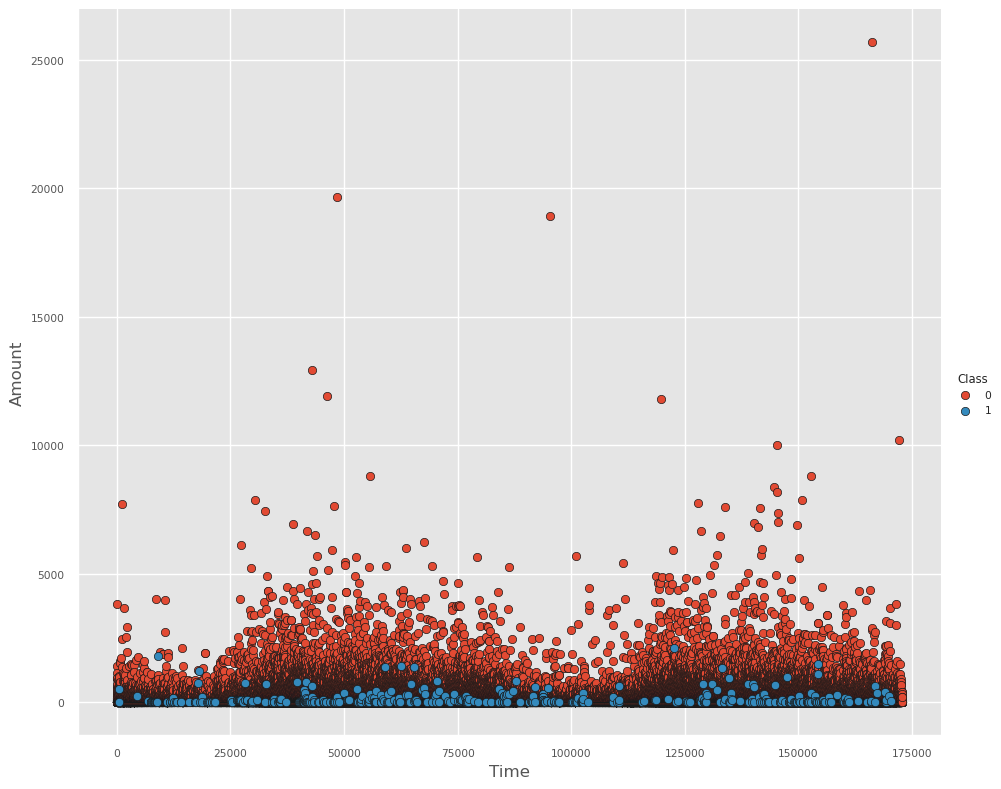

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
sns.FacetGrid(data, hue="Class",height=8, aspect=1.2).map(plt.scatter, "Time", "Amount", edgecolor="k").add_legend()
plt.show()

In [6]:
plt.savefig('amounttime.eps', format='eps')

<Figure size 640x480 with 0 Axes>

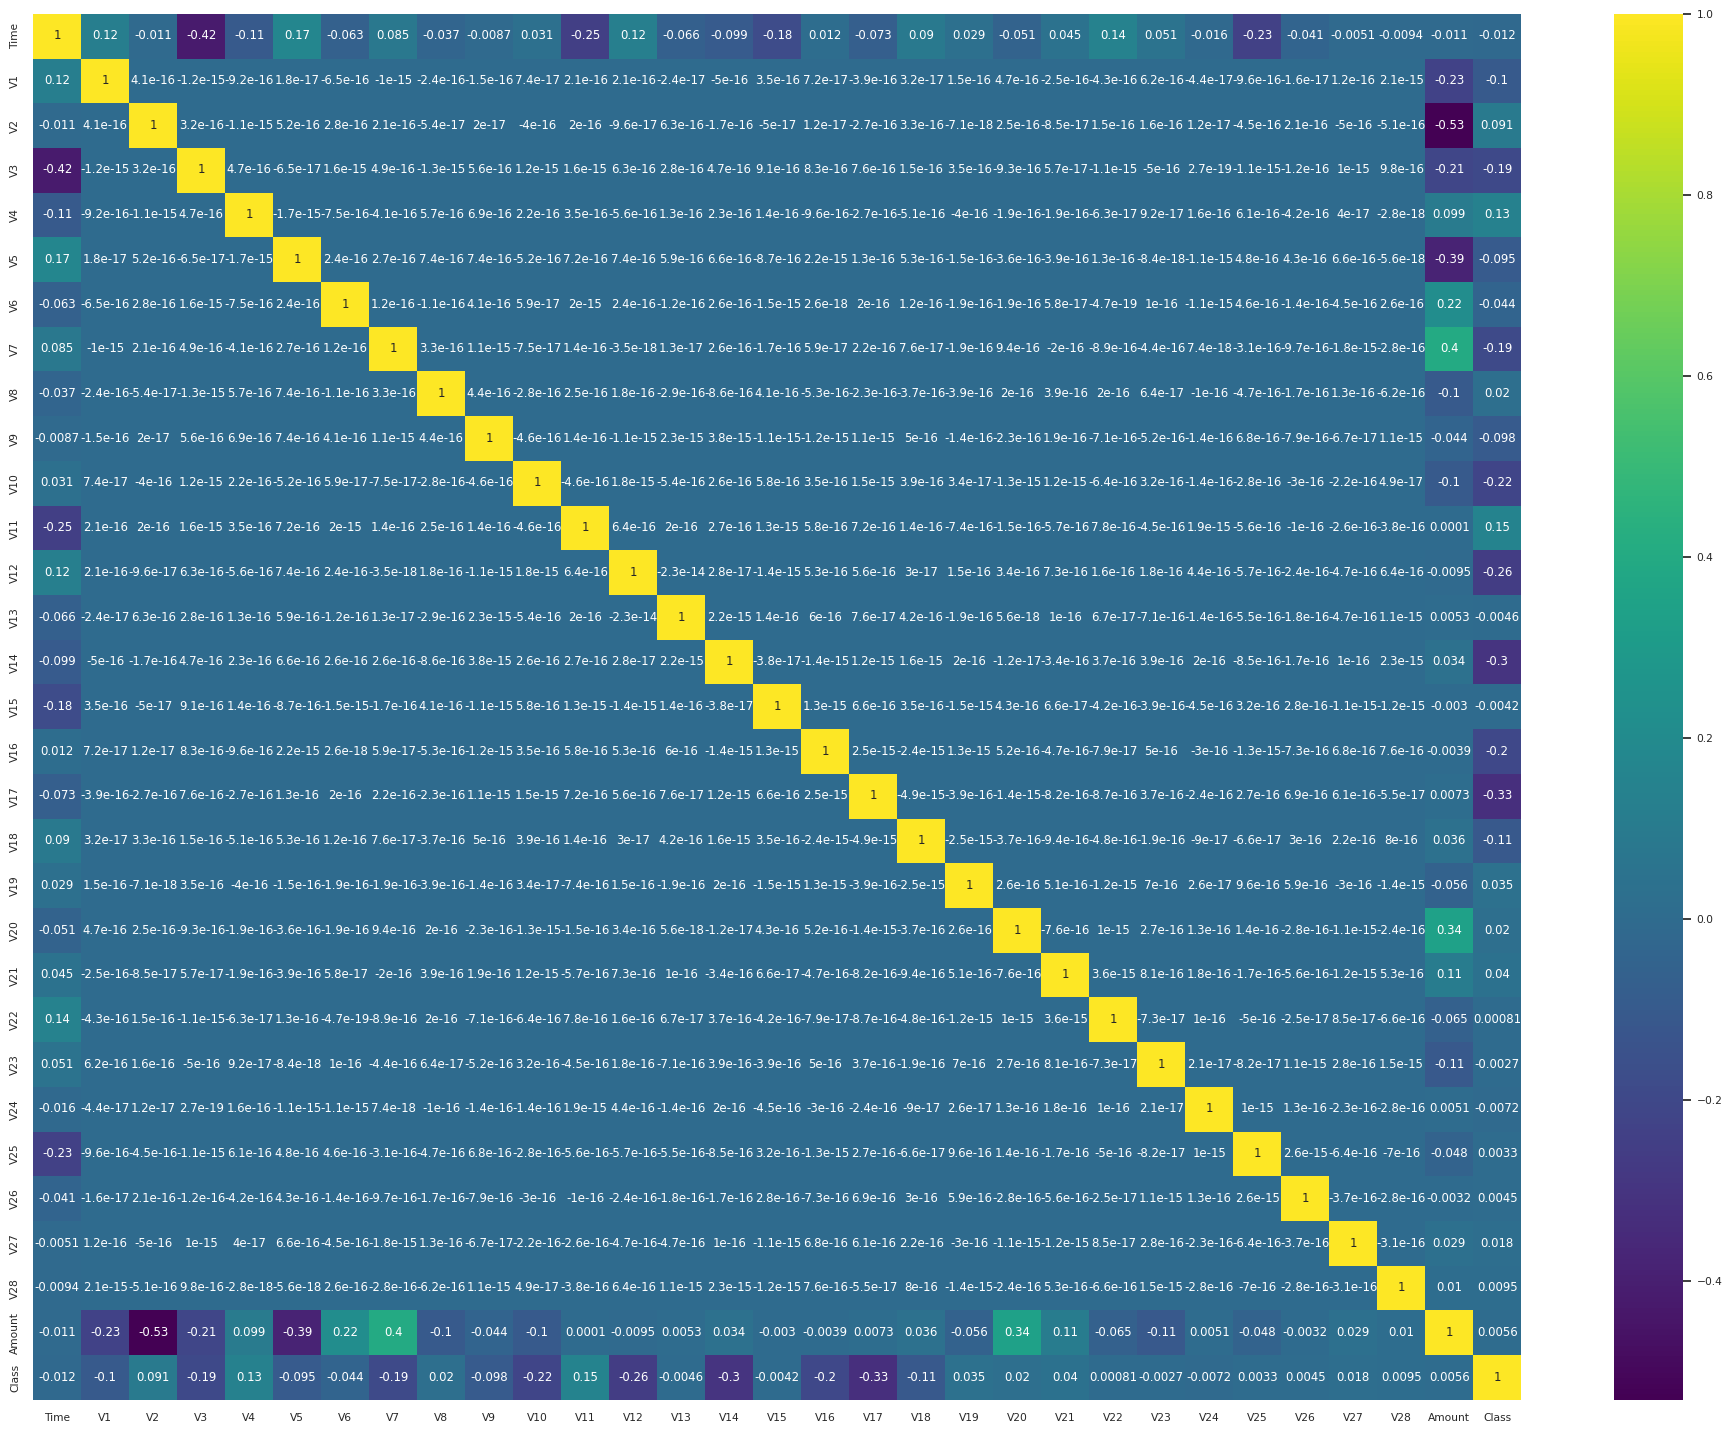

In [7]:
corr = data.corr()
plt.figure(figsize =(24,18))
sns.set(font_scale=0.7)
sns.heatmap(corr ,cmap ='viridis' , annot = True )
plt.show()

In [8]:
plt.savefig('correlation.eps', format='eps')

<Figure size 640x480 with 0 Axes>

In [2]:
df=data.copy()

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# 假设df是你的DataFrame，包含了需要降维的特征和'class'列
# 取出需要进行降维的特征列和'class'列
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11','V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
# 仅对 'Amount' 列进行归一化
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])
data['Time'] = scaler.fit_transform(data[['Time']])
# 移除原始 'Amount' 列
# data.drop('Amount', axis=1, inplace=True)

In [20]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [30]:
# PCA降维到2维
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

In [32]:
# t-SNE降维到2维
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data[0:50000])

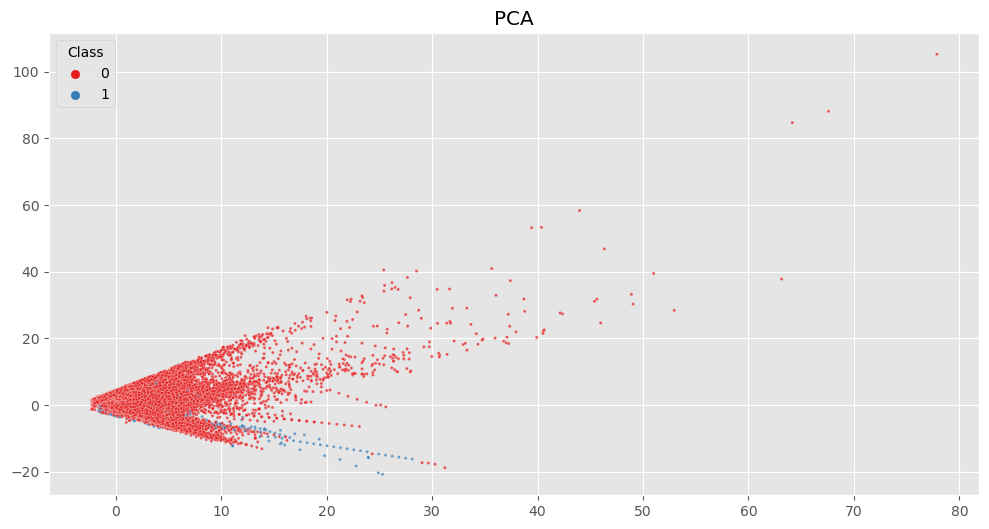

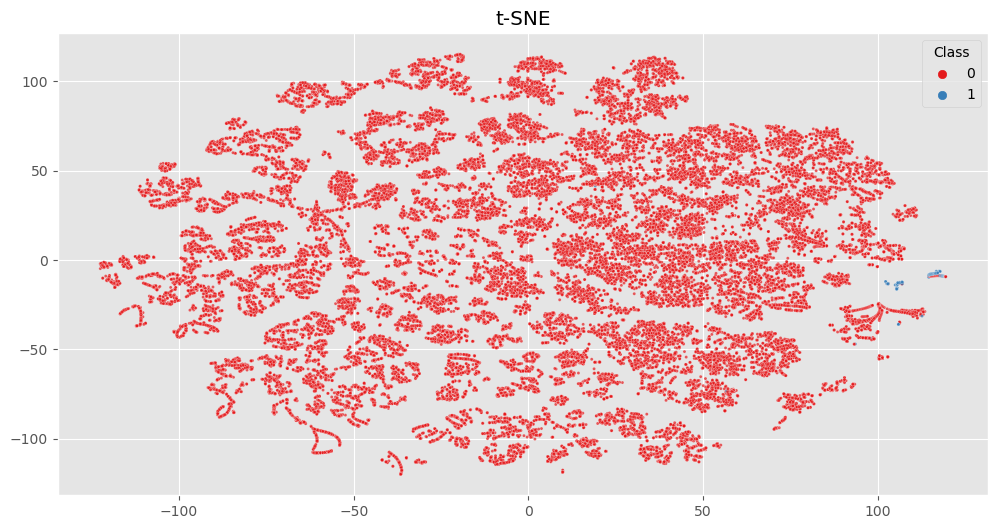

In [39]:
# 可视化
plt.figure(figsize=(12, 6))

# 使用seaborn设置颜色映射
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['Class'],s=5, palette='Set1', alpha=0.7)
plt.title('PCA')

plt.figure(figsize=(12, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=df['Class'][0:50000],s=5, palette='Set1', alpha=0.7)
plt.title('t-SNE')

plt.show()

In [9]:
from sklearn.ensemble import IsolationForest
import itertools
import time

In [4]:
datacopy=data.copy()
to_model_cols=datacopy.columns[1:30]

In [12]:
492/len(data)

0.001727485630620034

In [14]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report, precision_recall_fscore_support
n_estimators_values = [1000]  # Example values for n_estimators
contamination_values = [0.001]  # Example values for contamination
max_features_values=[1.0]
# Create a list of all combinations of hyperparameters
grid_search = list(itertools.product(n_estimators_values, contamination_values,max_features_values))
datacopy=data.copy()
to_model_cols=datacopy.columns[1:30]
# Initialize an empty list to store the results
results_df_list = []
results_list = []

for params in grid_search:
    
    n_estimators_val, contamination_val,max_features_val = params
    start_time = time.time()
    # Create a new IsolationForest classifier with the current hyperparameters
    clf = IsolationForest(n_estimators=n_estimators_val, max_samples=1.0, contamination=contamination_val,
                          max_features=1.0, bootstrap=False, n_jobs=-1, random_state=12345, verbose=0)

    # Fit the classifier and make predictions
    clf.fit(datacopy[to_model_cols])
    pred = clf.predict(datacopy[to_model_cols])
    datacopy['Class'] = pred
    end_time = time.time()
    elapsed_time = end_time - start_time
    # Store the results in a DataFrame
    datacopy[datacopy['Class'] == 1] = 0
    datacopy[datacopy['Class'] == -1] = 1
    precision,recall,fbeta_score, support  = precision_recall_fscore_support(data['Class'], datacopy['Class'], average='binary')
    print("precision ", round((precision), 4))
    print("recall ", round((recall), 4))
    print("F1 score on Test", round((fbeta_score), 4))
    preindex1 = set(datacopy.index[datacopy['Class'] == 1].tolist())
    preindex3 = set(datacopy.index[datacopy['Class'] == 0].tolist())
    preindex2 = set(data.index[data['Class'] == 1].tolist())
    preindex4 = set(data.index[data['Class'] == 0].tolist())
    acc=(len(preindex1&preindex2)+len(preindex3&preindex4))/len(data)
    p=len(preindex1&preindex2)/len(preindex1)
    recall=len(preindex1&preindex2)/len(preindex2)
    f1=2*p*recall/(recall+p)
    result=[params[0],params[1],params[2],len(preindex1),len(preindex1&preindex2),acc,p,recall,f1,elapsed_time]
    print(result)
    results_list.append(result)
    results_df_list.append([params,datacopy])

precision  0.3089
recall  0.3089
F1 score on Test 0.3089
[2000, 0.001727485630620034, 1.0, 492, 152, 0.9976124182341024, 0.3089430894308943, 0.3089430894308943, 0.3089430894308943, 585.8012974262238]


[1050, 0.0065, 1.0, 1852, 309, 0.993939755694207, 0.16684665226781858, 0.6280487804878049, 0.2636518771331058, 99.0349133014679]

[2000, 0.0065, 1.0, 1852, 309, 0.993939755694207, 0.16684665226781858, 0.6280487804878049, 0.2636518771331058, 190.9995265007019]

[1000, 0.00172, 1.0, 490, 154, 0.9976334851320368, 0.3142857142857143, 0.3130081300813008, 0.3136456211812627, 344.2304286956787]

[2000, 0.001727485630620034, 1.0, 492, 152, 0.9976124182341024, 0.3089430894308943, 0.3089430894308943, 0.3089430894308943, 585.8012974262238]

In [ ]:
#分训练集和测试集

In [32]:
from sklearn.model_selection import train_test_split
datacopy=data.copy()
train,test= train_test_split(datacopy,test_size=0.2, random_state=12345)
to_model_cols=datacopy.columns[0:30]

In [38]:
n_estimators_val = 100
contamination_val = 0.001
max_features_val=1.0
# Initialize an empty list to store the results
results_df_list = []
results_list = []
outlier_fraction = len(train[data['Class']==1])/float(len(train[train['Class']==0]))
start_time = time.time()
# Create a new IsolationForest classifier with the current hyperparameters
clf = IsolationForest(n_estimators=n_estimators_val, max_samples='auto', contamination=contamination_val, 
                      max_features=1.0, bootstrap=False, n_jobs=-1, random_state=12345, verbose=0)

# Fit the classifier and make predictions
clf.fit(X=train[to_model_cols])
train_f=train[to_model_cols]
pred2 = clf.predict(train_f)
end_time1 = time.time()
test_f=test[to_model_cols]
pred = clf.predict(test_f)
end_time2 = time.time()
test_f['Class'] = pred
train_f['Class'] = pred2

elapsed_time1 = end_time1 - start_time
elapsed_time2 = end_time2 - end_time1
# Store the results in a DataFrame
preindex1 = set(train_f.index[train_f['Class'] == -1].tolist())
preindex3 = set(train_f.index[train_f['Class'] == 1].tolist())
preindex2 = set(train.index[train['Class'] == 1].tolist())
preindex4 = set(train.index[train['Class'] == 0].tolist())
acc=(len(preindex1&preindex2)+len(preindex3&preindex4))/len(train)
p=len(preindex1&preindex2)/len(preindex1)
recall=len(preindex1&preindex2)/len(preindex2)
f1=2*p*recall/(recall+p)
result=[n_estimators_val,contamination_val,max_features_val,len(preindex1),len(preindex1&preindex2),acc,p,recall,f1,elapsed_time1]
print(result)
results_list.append(result)


preindex1 = set(test_f.index[test_f['Class'] == -1].tolist())
preindex3 = set(test_f.index[test_f['Class'] == 1].tolist())
preindex2 = set(test.index[test['Class'] == 1].tolist())
preindex4 = set(test.index[test['Class'] == 0].tolist())
acc=(len(preindex1&preindex2)+len(preindex3&preindex4))/len(test)
p=len(preindex1&preindex2)/len(preindex1)
recall=len(preindex1&preindex2)/len(preindex2)
f1=2*p*recall/(recall+p)
result=[n_estimators_val,contamination_val,max_features_val,len(preindex1),len(preindex1&preindex2),acc,p,recall,f1,elapsed_time2]
print(result)
results_list.append(result)

[100, 0.001, 1.0, 228, 86, 0.9979898615286708, 0.37719298245614036, 0.21393034825870647, 0.27301587301587305, 13.772002220153809]
[100, 0.001, 1.0, 68, 19, 0.9978933323970366, 0.27941176470588236, 0.2111111111111111, 0.8589461595316263, 1.7805476188659668]


In [ ]:
#SVM

In [4]:
from sklearn.metrics import precision_score,recall_score, f1_score
from sklearn.model_selection import train_test_split
df=data.copy()

# 提取特征列和目标列
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]
# 将数据随机分成训练集和测试集，test_size=0.2 表示测试集占总样本的比例为 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
from sklearn import svm
# SVM的参数
C_values = [0.01, 0.1, 1, 10]  
kernel_values = ['linear', 'rbf', 'poly', 'sigmoid']
grid_search = list(itertools.product(C_values, kernel_values))
start_time = time.time()
clf = svm.OneClassSVM(kernel="rbf", degree=3, gamma=0.1, nu=0.01, max_iter=-1)
# 训练SVM模型
clf.fit_predict(df[0:50000])
end_time1 = time.time()
svm_predict = pd.Series(y_predict).replace([-1,1],[1,0])
svm_anomalies = df[svm_predict==1]

In [ ]:
#DBSCAN

In [23]:
from sklearn.cluster import DBSCAN
start_time = time.time()
db = DBSCAN(eps=3.0, min_samples=10).fit(data.iloc[:, 1:-1])
end_time1 = time.time()
elapsed_time1 = end_time1 - start_time
labels = db.labels_

In [28]:
def find_all_indices(arr, target):
    indices = []
    for idx, value in enumerate(arr):
        if value == target:
            indices.append(idx)
    return indices

In [29]:
arr = labels
target = -1
result = find_all_indices(arr, target)

In [ ]:
a=(2*len(set(result)&set(data.index[data['Class'] == 1].tolist()))+len(set(data.index[data['Class'] == 0].tolist()))-len(set(result)))/len(data)
p=len(set(result)&set(data.index[data['Class'] == 1].tolist()))/len(set(result))
r=len(set(result)&set(data.index[data['Class'] == 1].tolist()))/len(set(data.index[data['Class'] == 1].tolist()))
f1=2*p*r/(p+r)
print(a,p,r,f1,elapsed_time1)

In [ ]:
#XGBoost

In [6]:
from sklearn.metrics import precision_score,recall_score, f1_score
from sklearn.model_selection import train_test_split
df=data.copy()

# 提取特征列和目标列
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]
# 将数据随机分成训练集和测试集，test_size=0.2 表示测试集占总样本的比例为 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.metrics import precision_score,recall_score
def print_score(label, prediction, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")
        print(f"precision Score: {precision_score(label, prediction) * 100:.2f}%")
        print(f"recall Score: {recall_score(label, prediction) * 100:.2f}%")
        print(f"F1 Score: {f1_score(label, prediction) * 100:.2f}%")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Classification Report:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n") 
        print(f"precision Score: {precision_score(label, prediction) * 100:.2f}%")
        print(f"recall Score: {recall_score(label, prediction) * 100:.2f}%")
        print(f"F1 Score: {f1_score(label, prediction) * 100:.2f}%")

In [26]:
from xgboost import XGBClassifier
start_time = time.time()
xgb_clf = XGBClassifier(n_estimators=100,learning_rate=0.3,max_depth=5)
xgb_clf.fit(X_train, y_train, eval_metric='aucpr')
y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)
end_time1 = time.time()
print(end_time1-start_time)

56.316606283187866


In [28]:
print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision       1.0    1.0       1.0        1.0           1.0
recall          1.0    1.0       1.0        1.0           1.0
f1-score        1.0    1.0       1.0        1.0           1.0
support    227468.0  377.0       1.0   227845.0      227845.0
_______________________________________________
Confusion Matrix: 
 [[227468      0]
 [     0    377]]

precision Score: 100.00%
recall Score: 100.00%
F1 Score: 100.00%
Test Result:
Accuracy Score: 99.95%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999596    0.948454  0.999508      0.974025      0.999492
recall         0.999912    0.800000  0.999508      0.899956      0.999508
f1-score       0.999754    0.867925  0.999508      0.933839      0.999488
support  

Train Result:
================================================
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision       1.0    1.0       1.0        1.0           1.0
recall          1.0    1.0       1.0        1.0           1.0
f1-score        1.0    1.0       1.0        1.0           1.0
support    227468.0  377.0       1.0   227845.0      227845.0
_______________________________________________
Confusion Matrix: 
 [[227468      0]
 [     0    377]]

precision Score: 100.00%
recall Score: 100.00%
F1 Score: 100.00%
Test Result:
================================================
Accuracy Score: 99.95%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999631    0.940000  0.999526      0.969815      0.999510
recall         0.999894    0.817391  0.999526      0.908643      0.999526
f1-score       0.999763    0.874419  0.999526      0.937091      0.999509
support    56847.000000  115.000000  0.999526  56962.000000  56962.000000
_______________________________________________
Confusion Matrix: 
 [[56841     6]
 [   21    94]]

precision Score: 94.00%
recall Score: 81.74%
F1 Score: 87.44%

In [ ]:
#RandomForest

In [29]:
from sklearn.ensemble import RandomForestClassifier
start_time = time.time()
rf_clf = RandomForestClassifier(n_estimators=100,oob_score=False)
rf_clf.fit(X_train, y_train)
y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)
end_time1 = time.time()
print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:
                  0      1  accuracy  macro avg  weighted avg
precision       1.0    1.0       1.0        1.0           1.0
recall          1.0    1.0       1.0        1.0           1.0
f1-score        1.0    1.0       1.0        1.0           1.0
support    227468.0  377.0       1.0   227845.0      227845.0
_______________________________________________
Confusion Matrix: 
 [[227468      0]
 [     0    377]]

precision Score: 100.00%
recall Score: 100.00%
F1 Score: 100.00%
Test Result:
Accuracy Score: 99.95%
_______________________________________________
Classification Report:
                      0           1  accuracy     macro avg  weighted avg
precision      0.999578    0.947917  0.999491      0.973747      0.999474
recall         0.999912    0.791304  0.999491      0.895608      0.999491
f1-score       0.999745    0.862559  0.999491      0.931152      0.999468
support  

In [30]:
print(end_time1-start_time)

314.0840394496918


In [24]:
list(rf_clf.feature_importances_)

[0.015799744600862975,
 0.013524928523447773,
 0.01755801890727693,
 0.028270105134355825,
 0.012492477237035966,
 0.01550716744496893,
 0.021514117402001695,
 0.01229272617203845,
 0.031464380921960376,
 0.07315723819648311,
 0.06991066701928052,
 0.1142410303121719,
 0.010994169456864657,
 0.08395283962667367,
 0.010829546320428209,
 0.08273750858872643,
 0.2144983917020707,
 0.03460700791099608,
 0.011557694836216307,
 0.014811287360329753,
 0.016516919246415383,
 0.012339219104562035,
 0.007326821605215276,
 0.009379457865818711,
 0.009975123071616455,
 0.023621367879462393,
 0.010472289189574371,
 0.009364254195747214,
 0.01128350016739797]

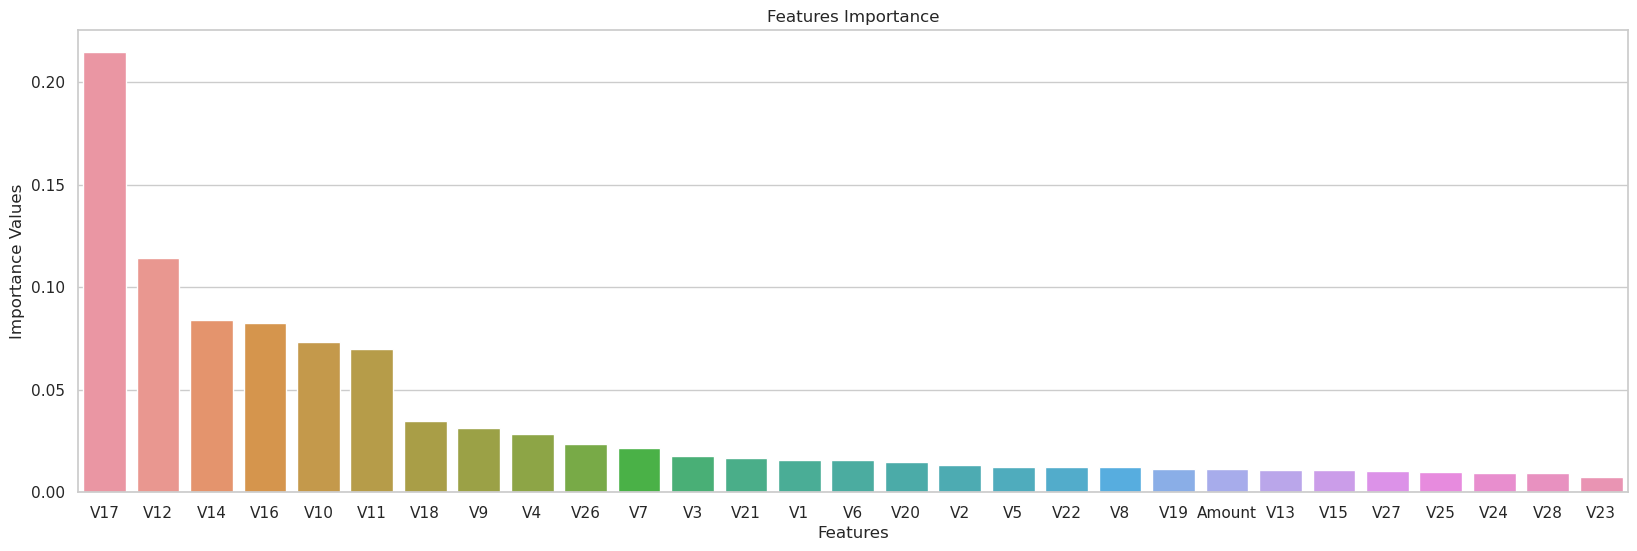

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sorted_data = sorted(zip(list(rf_clf.feature_importances_),X_train.columns.tolist()), reverse=True)
sorted_values, sorted_names = zip(*sorted_data)

# 使用Seaborn绘制柱状图
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.barplot(x=list(sorted_names), y=list(sorted_values))
plt.xlabel('Features')
plt.ylabel('Importance Values')
plt.title('Features Importance')
plt.show()

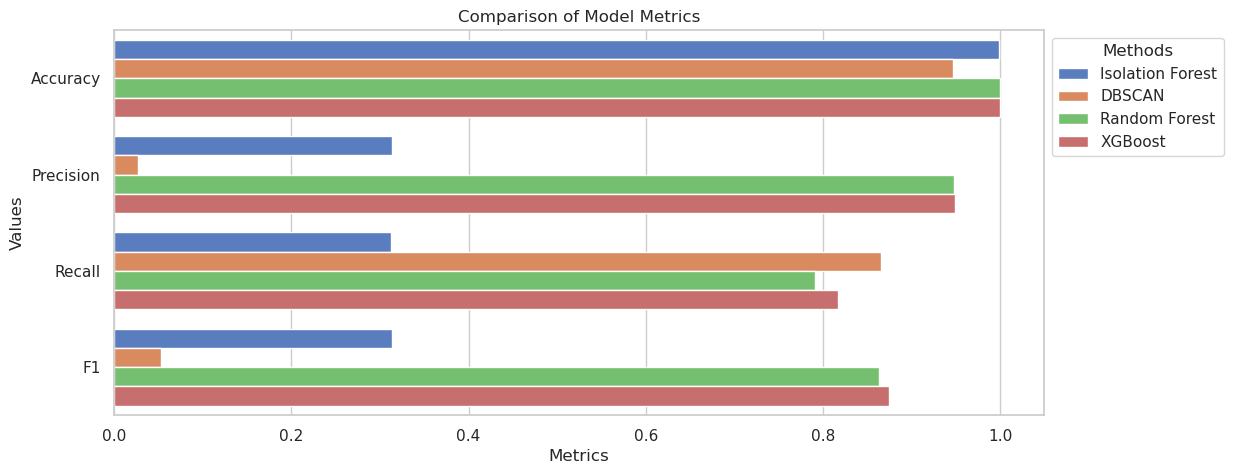

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 创建数据表格
data = {
    'Method': ['Isolation Forest', 'DBSCAN', 'Random Forest', 'XGBoost'],
    'Accuracy': [0.998, 0.946, 0.999, 0.999],
    'Precision': [0.314, 0.027, 0.948, 0.949],
    'Recall': [0.313, 0.865, 0.791, 0.817],
    'F1': [0.314, 0.053, 0.863, 0.874]
}

# 将数据转换成适合绘图的格式
df = pd.DataFrame(data)
df = pd.melt(df, id_vars=['Method'], var_name='Metric', value_name='Value')

# 设置Seaborn样式
sns.set(style="whitegrid")

# 绘制柱形图
plt.figure(figsize=(12, 5))
sns.barplot(x='Value', y='Metric', hue='Method', data=df, palette='muted')
plt.title('Comparison of Model Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.legend(title='Methods', bbox_to_anchor=(1, 1))
plt.show()